In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/End/SMSSpamCollection.tsv
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/End/02_02.ipynb
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/End/.ipynb_checkpoints/02_02-checkpoint.ipynb
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/SMSSpamCollection.tsv
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/02_02.ipynb
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_02/Start/.ipynb_checkpoints/02_02-checkpoint.ipynb
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_04/End/SMSSpamCollection.tsv
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_04/End/02_04.ipynb
/kaggle/input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch02/02_04/End/.ipynb_checkpoints/02_04-checkpoint.ipynb
/

In [2]:
import nltk
#dir(nltk) #shows us all the functions in the nltk package

**What can you do with NLTK**

Stopwords are words that are used frequently but dont really contribute to the sentence AKA sentiment neutral

In [3]:
from nltk.corpus import stopwords
stopwords.words('english')[0:500:25]#print english stopwords but the 25 word in the list upt to the 500th position

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

**NLP Basics: Reading in text data & why do we need to clean the text?**

**Read in semi-structured text data**

In [4]:
#Read in the raw text
rawData = open('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv').read()

#Print the raw data, first 500 characters
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

From reading the data we can see that it has added \t and \n to indicate tabs and new paragraphs. If we want to loop the data into a list we first make sure we have one indicator so replace \t with \n, then we can split the string everytime we get a \n.

In [5]:
parsedData = rawData.replace('\t','\n').split('\n')
parsedData[0:7] #show the first 7

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 "Nah I don't think he goes to usf, he lives around here though",
 'ham']

We can see that Ham, spam are alternating every two rows and can be used as its own column (label) so let's try to get the list for all the labels and for all the text which also alternates

In [6]:
labelList = parsedData[0::2] #start at the begining and every 2nd postioned pull the value into the label list, until the end of the list
#labelList[0:7]#show the first 7
textList = parsedData[1::2] #start at position 1 and every 2nd position pull the value into the text list, until the end of the list
#textList[0:7] #show the first 7
print(len(labelList))
print(len(textList))


5571
5570


In [7]:
fullCorpus = pd.DataFrame({'label' : labelList[:-1], 'body_list':textList}) #create a dataframe out of a dictionary that was created using the two previous lists we had. But had to call once less argument for label list in order for the size of the dictionary to match
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


**Could have done this using pandas built in methods which can recognise the file as a tab delimited file, the main giveaway for this was the fact that the file is saved as .tsv and when we printed the read data we had \t**

In [8]:
fullCorpus = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
fullCorpus

#But we are currently missing column names in out df, lets add some
fullCorpus.columns = ['label', 'text']
fullCorpus

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...


**Explore the dataset**

In [9]:
#What is the shape of the dataset?
print("Input data has {} rows and {} columns".format(len(fullCorpus), len(fullCorpus.columns)))

#How many spam/ham are there?
print("Out of {} rows, {} are spam, {} are ham".format(len(fullCorpus), len(fullCorpus[fullCorpus['label'] == 'spam']), len(fullCorpus[fullCorpus['label'] == 'ham'])))

#How much missing data is there?
print('Number of null in lablel: {}'.format(fullCorpus['label'].isnull().sum()))
print('Number of null in text: {}'.format(fullCorpus['text'].isnull().sum()))

Input data has 5568 rows and 2 columns
Out of 5568 rows, 746 are spam, 4822 are ham
Number of null in lablel: 0
Number of null in text: 0


**NLP Basics: Learning how to use regular expressions**

**Using regular expressions in Python**

Python's re package is the most commonly used regex resource

In [10]:
import re
print(re.split('\W+',"some of the-words are+combined"))

import nltk
stopword = nltk.corpus.stopwords.words('english')#gets a list of all the english stopwords in the nltk package

def remove_stopwords(tokenized_list):
    text_no_stopwords = [word for word in tokenized_list if word not in stopword]
    return text_no_stopwords
a = 'This is a test for the man to be successful in their lives'
def tokenize(text):
    tokens = re.split('\W+', text) #will split data whenever it finds a non-word character i.e. whitespace, punctuation etc
    return tokens #returns list of tokens

remove_stopwords(tokenize(a))


['some', 'of', 'the', 'words', 'are', 'combined']


['This', 'test', 'man', 'successful', 'lives']

In [11]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This     is a made up     string to test 2      different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different-regex-methods'

#Splitting a sentence into a list of words
re.split('\s', re_test) #split on the single whitespace
re.split('\s+', re_test_messy) #split on one or more whitespace
re.split('\W+', re_test_messy1) #split on one or more non-word characters

re.findall('\w+',re_test_messy1) #Looks for one or more word characters and splits on non words

#Replacing a specific string
#objective is to find where pep8 or similar to pep8 is written and replace it with python style guide
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

re.findall('[a-z]+', pep8_test) #Will pill back all letters in a word that are lowercase until it meets something like a whitespace, number, capital letter, special character etc
re.findall('[A-Z]+', pep8_test) #captures I, PEP, 8 is missing
re.findall('[A-Z]+[0-9]+', pep8_test) #captutres PEP8 as its capital letters and number

re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test) #works on all tests

# other useful methods include search(), match(), fullmatch(), finditer(), escape()
#start with a goal/what you want to pull from text and use a regex cheatsheet to identify the correct pattern

'I try to follow PEP8 Python Styleguide guidelines'

**NLP Basics: Implementing s pipeline to clean text**

**Pre-processing text data**

Cleaning up the text data is necessary to highlight attributes that you're going to want your machine learning algortihm to pick up on. Cleaning/pre-processing the data typically consists of a number of steps:

1. Remove punctuation
2. Tokenization
3. Remove stopwords
4. Lematize/Stem

The first three steps are covered in this chapter as they're implemented in pretty much any text cleaning pipeline. Lemmatizing and stemming are covered in the next chapter as they're helpful but not critical.

In [12]:
pd.set_option('display.max_colwidth', 100) #customises the maximum number of characters displayed in the pandas column to 100 instead of 50
data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']
data.head()

#aim here is to have the data in body text, split up by words (tokenised) and all punctuation and stop

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


**Remove Punctuation**

In [13]:
import string

string.punctuation
def remove_punct(text):#list comprehension function to remove punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation]) #had to join all the chracters up without any spacing#return character for each character in text if charachter is not punctuation
    return text_nopunct
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x)) #create a new column in df called body text clean which will have the data with no punctuation
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


**Tokenization**

In [14]:
def tokenize(text):
    tokens = re.split('\W+', text) #will split data whenever it finds a non-word character i.e. whitespace, punctuation etc
    return tokens #returns list of tokens
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower())) #lowercase makes all the atringa the same so 'NLP' =='nlp' will be understood as the same thing
data.head()


,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


**Remove stopwords**

Words that are commonly used: like, the, what, if, etc. So can allow ML model to focus on interested words

In [15]:
import nltk
stopword = nltk.corpus.stopwords.words('english')#gets a list of all the english stopwords in the nltk package

def remove_stopwords(tokenized_list):
    text_no_stopwords = [word for word in tokenized_list if word not in stopword]
    return text_no_stopwords

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


**Supplemental Data Cleansing: Using Stemming**

**Test out Porter stemmer**

In [16]:
import  nltk

ps = nltk.PorterStemmer()
dir(ps) #Can see that there is loads of functions avaialbe

#lets try stemming on iterations for grow
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

#lets try stemming on iterstions for run, stemming is not perfect but was able to recogonize runner has a different meaning
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner')) 



grow
grow
grow
run
run
runner


**Read in raw text**, 
**Clean up text**, 
**Stem text**

In [17]:
#Read in raw text
pd.set_option('display.max_colwidth', 100) #customises the maximum number of characters displayed in the pandas column to 100 instead of 50
data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
stopwords = nltk.corpus.stopwords.words('english') #get a list of all the stop words
data.columns = ['label', 'body_text']
data.head()

#Clean up text
import string
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]#now word as we are iterating over a list and not a string
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda x : clean_text(x.lower()))
data.head()

#stem data
def stem_text(text):
    text = [ps.stem(word) for word in text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stem_text(x))
data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


**Supplemental Data Cleaning: Using a Lemmatizer**

**Test out WordNet Lemmatizer**

In [18]:
import nltk
import nltk
nltk.download('omw-1.4')

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

dir(wn)#Shows us the attributes and methods available for the WordNet Lemmatizer

#In the below example the lemmatizer fails to find the words lemma and returns the word but stemmer reduces it mean which loses the senitment of the word meaning
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning')) 

print(ps.stem('meanness'))
print(ps.stem('meaning'))

#lemmetizer recogongises that the words are related and returns the lemma - goose, whereas the stemmer returns gees and goos
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese')) 

print(ps.stem('geese'))
print(ps.stem('goose'))

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


meanness
meaning
mean
mean
goose
goose
gees
goos


**Read in raw text,** **Clean up text**, **Lemmatizae text**


In [19]:
import nltk
import pandas as pd
import string
import re
nltk.download('omw-1.4')

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()


#Read in raw text
pd.set_option('display.max_colwidth', 100) #customises the maximum number of characters displayed in the pandas column to 100 instead of 50
data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
stopwords = nltk.corpus.stopwords.words('english') #get a list of all the stop words
data.columns = ['label', 'body_text']
data.head()

#Clean up text
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]#now word as we are iterating over a list and not a string
    return text

data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))
data.head()

#lemmatize text
def lemmatize_text(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['body_text_lemmatize'] = data['body_text_nostop'].apply(lambda x: lemmatize_text(x))
data.head()



[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,label,body_text,body_text_nostop,body_text_lemmatize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"


**Vectorizing Raw Data: Count Vectorization**

**Count vectorization**

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occured in that document

**Read in raw text,** **Clean up text**, **Stem text**

In [20]:
import nltk
import pandas as pd
import string
import re

ps = nltk.PorterStemmer()

#Read in raw text
pd.set_option('display.max_colwidth', 100) #customises the maximum number of characters displayed in the pandas column to 100 instead of 50
data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
stopwords = nltk.corpus.stopwords.words('english') #get a list of all the stop words
data.columns = ['label', 'body_text']
data.head()

#pre-process data
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]#now word as we are iterating over a list and not a string
    return text
#data['clean_body_text'] = data['body_text'].apply(lambda x: clean_text(x.lower()))
#data.head()

**Apply CountVectorizer**

Previously, we had to use the apply() method and lambda function to clean the data but now the CountVectorizer(analyzer = pre-processing function) allows us to apply the cleaninig/preprocssing function directly


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text) 
X_counts_1 = count_vect.fit(data['body_text']) #fit will let the ML model learn from the data but wont transform the data, thats why we need to use fit_transform in order to transform the data too
X_counts = count_vect.fit_transform(data['body_text']) #created the vectorised data which is stored as a sparse matrix/document term matrix

#print(X_counts.shape) #Tells us the number of text messages and the number of unique words
#print(count_vect.get_feature_names()) 

#Apply CountVectorizer to smaller sample  for easier visualisation of the fitted/trasnformed data
data_sample = data[0:20] # use first 20 rows of data
count_vect_sample = CountVectorizer(analyzer=clean_text)
X_count_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_count_sample.shape)
print(count_vect_sample.get_feature_names())#returns all the columns names


(20, 220)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'a', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'as', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'from', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'had', 'have', 'he', 'help', 'hl', 'home', 'hour', 'httpwap', 'i', 'im', 'info', 'is', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership'

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Vectorizers output sparse matrices**

**Sparse Matrix:** A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements

In [22]:
X_count_sample #when calling the sparse matrix it just returns a description of the data held and not the matrix, to fet the matrix we need to convert the sparse matrix into an arrray and then a dataframe

<20x220 sparse matrix of type '<class 'numpy.int64'>'
	with 253 stored elements in Compressed Sparse Row format>

In [23]:
X_count_sample.toarray()#adds the 0 elements
X_counts_df = pd.DataFrame(X_count_sample.toarray())
X_counts_df #prints document term matrix but is missing the column names, to get the column names we need to get the feature names from the vectorizer
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,you,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


#### **Vectorizing Raw Data: N-Grams**

**N-Grams**

Creates a document term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.
For example, "NLP is an interesting topic"

* n * Name * Tokens
* 2 * bigram * ["nip is", "is an", "an intreseting", "interesting topic"]
* 3 * trigram * ["nip is an", "is an interesting", "an interesting topic"]
* 4 * four-gram * ["nlp is an interesting", "is an interesting topic"]

In [24]:
#Read in text
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])#Had to add this step to make the output a strig, it is joining the words together with a space in between them
    return text
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

#Apply CountVectorizer(with N-Grams)
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range =(2,2))#only want to earch for bigrams
X_counts = ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)#shows 31000 unique 2 word combinations (bigrams)
#print(ngram_vect.get_feature_names())



(5568, 31275)


In [25]:
#Lets use a smaller sample for easier visualisation
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
'''Remember Vectorizers output sparse matrices so we will need to convert this back into a dataframe
Spare Matrix: A matrix in which most entries are 0. In the interest of effiecient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements'''

'Remember Vectorizers output sparse matrices so we will need to convert this back into a dataframe\nSpare Matrix: A matrix in which most entries are 0. In the interest of effiecient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements'

In [27]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Read in text
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
#data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
#data.head()

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)#(5568, 8107) so 8107 unique words same as count vectorizer but the tfidf vectorizer is getting the weighting not the count
#print(tfidf_vect.get_feature_names())

(5568, 8107)


In [29]:
#Apply TfidfVectorizer to samller sample
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer= clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

#change sparse matrix into dataframe

X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df.head()

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.238737,0.238737,0.209853,0.0,0.0,0.0,0.0,0.0
1,0.0,0.198986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.198986,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Feature Creation

In [30]:
#Read in text
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create feature for text message length
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))
data.head()

#create feature for % of text that is punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_length,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


Feature Evaluation

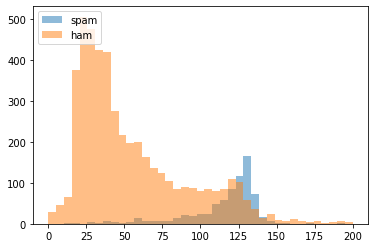

All in all this is a great way of visulaisng the distribution of the feature and clearly shows spam messages are generally longer in length than ham messages


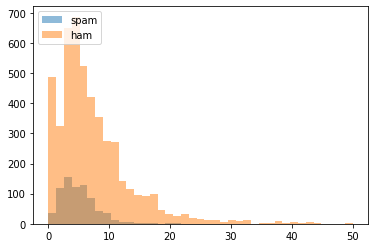

Plot shows that punct% may not be as strong of a feature as it doesnt seperate spam and ham messaged very well


In [31]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 200, 40)
pyplot.hist(data[data['label']=='spam']['body_length'], bins, alpha =0.5, label ='spam')
pyplot.hist(data[data['label']=='ham']['body_length'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show() 
print('All in all this is a great way of visulaisng the distribution of the feature and clearly shows spam messages are generally longer in length than ham messages')
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha =0.5, label ='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show() 
print('Plot shows that punct% may not be as strong of a feature as it doesnt seperate spam and ham messaged very well')

Identifying features for transformation

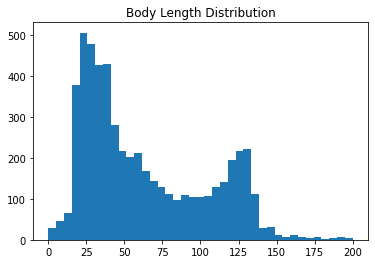

Bimodal distribution which makes sense as we had seen that the ham messages were of shorter lenght and the spam messages were of greater length


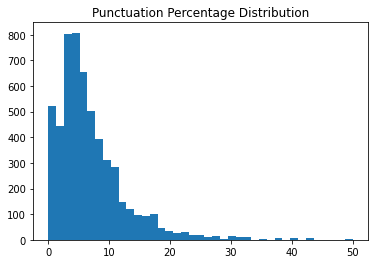

Data is heavily (right-tailed) skewed so model is at risk of being to biased with this feature could be of more use if it underwent a log transformation


In [32]:
#Read in text
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#plot the distribution to understand if any of the new features need a transformation
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0,200,40)
pyplot.hist(data['body_length'], bins)
pyplot.title('Body Length Distribution')
pyplot.show()
print('Bimodal distribution which makes sense as we had seen that the ham messages were of shorter lenght and the spam messages were of greater length')
bins = np.linspace(0,50,40)
pyplot.hist(data['punct%'], bins)
pyplot.title('Punctuation Percentage Distribution')
pyplot.show()
print('Data is heavily (right-tailed) skewed so model is at risk of being to biased with this feature could be of more use if it underwent a log transformation')

Box-Cox power transformation

Base Form: y^X, where y is the value of the cell

* X * Base Form * Transformation 
* -1 * y^-1 * 1/y 
* -0.5 * y^-0.5 * 1/(y^0.5) 
* 0 * y^0 * log(y) 
* 0.5 * y^0.5 * y^0.5

**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution



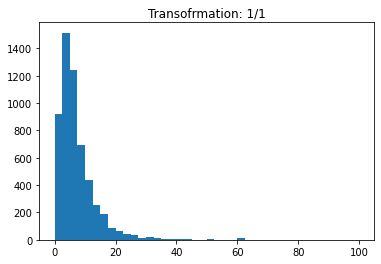

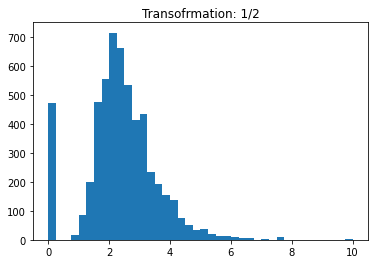

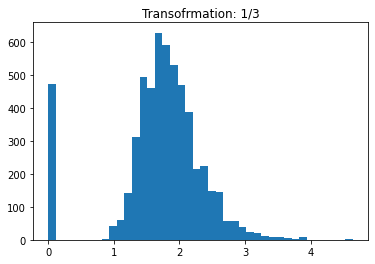

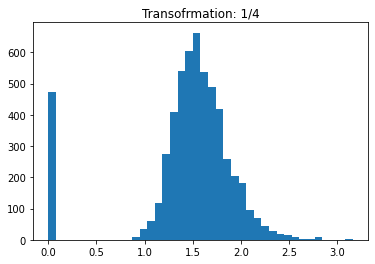

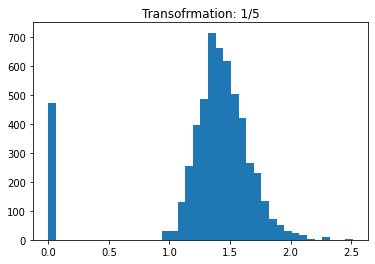

Transformation of 1/5 looks best as it more closely resembles a normal distribution
Object `value` not found.


In [33]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i),bins=40)
    pyplot.title('Transofrmation: 1/{}'.format(str(i)))
    pyplot.show()
print('Transformation of 1/5 looks best as it more closely resembles a normal distribution')

Next step lets apply the powere to 1/5 to the data frame and skecth the overlapping histograms again. Perhaps we can replace the 0's with the mean value?

In [34]:
data

,label,body_text,body_length,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,131,6.1
5564,ham,Will ü b going to esplanade fr home?,29,3.4
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",48,14.6
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,100,1.0


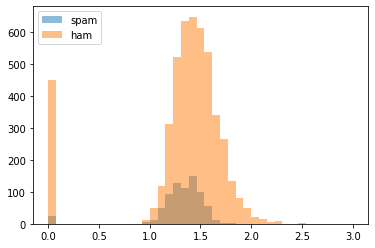

All in all this is a great way of visulaisng the distribution of the feature and clearly shows spam messages are generally longer in length than ham messages


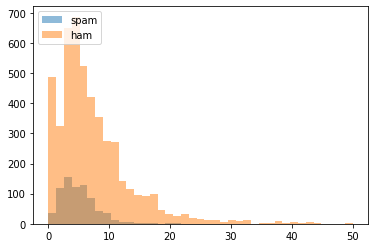

Plot shows that punct% may not be as strong of a feature as it doesnt seperate spam and ham messaged very well


In [35]:
data['transf_punct%'] = data['punct%'].apply(lambda x : x**(1/5))
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 3, 40)
pyplot.hist(data[data['label']=='spam']['transf_punct%'], bins, alpha =0.5, label ='spam')
pyplot.hist(data[data['label']=='ham']['transf_punct%'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show() 
print('All in all this is a great way of visulaisng the distribution of the feature and clearly shows spam messages are generally longer in length than ham messages')
bins = np.linspace(0, 50, 40)
pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha =0.5, label ='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show() 
print('Plot shows that punct% may not be as strong of a feature as it doesnt seperate spam and ham messaged very well')

Building Machine Learning Classifiers: Building a basic Random Forest Model

In [36]:
#Read in, clean and vectorize text

import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_features= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_features['transf_punct%'] = X_features['punct%'].apply(lambda x : x**(1/5))
X_features.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,body_length,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,transf_punct%
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.201124
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.362761
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.326040
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.261915
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.479966


Explore RandomForestClassifier Attributes & Hyperparameters

In [37]:
from sklearn.ensemble import RandomForestClassifier

#explore the random forest classifer model
print(dir(RandomForestClassifier)) #feature importances is really useful
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

Explore RandomForestClassifier through Cross-Validation

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs = -1) #setting n_jobs at -1 allows for faster computing as it lets the decision tress be built in parrallel
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv = k_fold, scoring ='accuracy', n_jobs=-1)

array([0.97486535, 0.97845601, 0.97666068, 0.96495957, 0.9703504 ])

**Building Machine Learning Classifiers: Random Forest on a holdout test set**

In [39]:
#Read in and clean text
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_features= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_features['transf_punct%'] = X_features['punct%'].apply(lambda x : x**(1/5))
X_features.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,body_length,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,transf_punct%
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.201124
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.362761
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.326040
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.261915
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.479966


Explore RandomForestClassifier through Holdout Set

In [40]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

#setup model and fit to training data
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_,X_train.columns), reverse =True)[0:20]

#moodel is now trained so need to do predicitons
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')#pos_label = spam to allow it work out precision
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), 
                                                         round(recall, 3), 
                                                         round((y_pred==y_test).sum()/len(y_pred), 3)))
print('Precision value indicates that all messages predicted as spam are actually spam, \nRecall value indicates that 56% of the spam messages were properly identified, \nAccuracy value indicates that 94% of the text messages were correctly identified as Spam or Ham')

Precision: 1.0 / Recall: 0.596 / Accuracy: 0.947
Precision value indicates that all messages predicted as spam are actually spam, 
Recall value indicates that 56% of the spam messages were properly identified, 
Accuracy value indicates that 94% of the text messages were correctly identified as Spam or Ham


**Building Machine Learning Classifiers: Explore Random Forest model with grid-search**

In [41]:
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_features= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_features['transf_punct%'] = X_features['punct%'].apply(lambda x : x**(1/5))
X_features.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,body_length,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,transf_punct%
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.201124
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.362761
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.326040
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.261915
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.479966


In [42]:
#Build our own Grid-search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators =n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')#pos_label = spam to allow it work out precision and recall i.e True/false postives etc
    print('Est: {} / Depth: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(n_est,depth,round(precision, 3),round(recall, 3),round((y_pred==y_test).sum()/len(y_pred), 3)))
for n_est in [10, 50 ,100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 / Precision: 1.0 / Recall: 0.2 / Accuracy: 0.896
Est: 10 / Depth: 20 / Precision: 1.0 / Recall: 0.586 / Accuracy: 0.946
Est: 10 / Depth: 30 / Precision: 1.0 / Recall: 0.71 / Accuracy: 0.962
Est: 10 / Depth: None / Precision: 0.992 / Recall: 0.834 / Accuracy: 0.978
Est: 50 / Depth: 10 / Precision: 1.0 / Recall: 0.255 / Accuracy: 0.903
Est: 50 / Depth: 20 / Precision: 1.0 / Recall: 0.655 / Accuracy: 0.955
Est: 50 / Depth: 30 / Precision: 1.0 / Recall: 0.772 / Accuracy: 0.97
Est: 50 / Depth: None / Precision: 1.0 / Recall: 0.862 / Accuracy: 0.982
Est: 100 / Depth: 10 / Precision: 1.0 / Recall: 0.166 / Accuracy: 0.891
Est: 100 / Depth: 20 / Precision: 1.0 / Recall: 0.614 / Accuracy: 0.95
Est: 100 / Depth: 30 / Precision: 1.0 / Recall: 0.807 / Accuracy: 0.975
Est: 100 / Depth: None / Precision: 1.0 / Recall: 0.897 / Accuracy: 0.987


**Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV**

Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model

Cross-validation: Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration

In [43]:
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_tfidf_feat= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_tfidf_feat['transf_punct%'] = X_tfidf_feat['punct%'].apply(lambda x : x**(1/5))
#X_tfidf_feat.head()

#lets make the same feature set but with count vectorizer instead of TF-IDF to see which is better
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_df = pd.DataFrame(X_count.toarray())
X_count_df.columns = count_vect.get_feature_names()
#X_count_df
X_count_feat = pd.concat([data['body_length'], data['punct%'], X_count_df], axis = 1)
X_count_feat['transf_punct%'] = X_count_feat['punct%'].apply(lambda x : x**(1/5))
#X_count_feat

#Exploring parameter settings using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators' : [10,150,300], 'max_depth' : [30,60,90,None]}
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_model = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_model.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.679848,0.027274,0.161007,0.002253,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.981149,0.973070,0.972172,0.973046,0.973046,0.974497,0.003344,1
7,15.813720,0.257362,0.313349,0.025214,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.980251,0.977558,0.974865,0.967655,0.970350,0.974136,0.004604,2
8,30.504294,0.581026,0.434770,0.009852,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.977558,0.973968,0.969452,0.970350,0.973957,0.003647,3
6,2.000656,0.196459,0.171108,0.007068,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.971275,0.983842,0.970377,0.968553,0.973944,0.973598,0.005409,4
10,17.282248,0.221264,0.309299,0.008818,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.974865,0.973968,0.971249,0.970350,0.973598,0.002588,5


In [44]:
rf = RandomForestClassifier()
param = {'n_estimators' : [10,150,300], 'max_depth' : [30,60,90,None]}
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_model = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_model.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,30.281745,3.059656,0.387841,0.051121,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978456,0.974865,0.974865,0.968553,0.971249,0.973598,0.003399,1
8,30.396632,0.602773,0.478574,0.035163,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.973968,0.974865,0.969452,0.970350,0.973239,0.002984,2
10,17.093700,0.279091,0.326318,0.033975,None,150,"{'max_depth': None, 'n_estimators': 150}",0.979354,0.973968,0.975763,0.965858,0.971249,0.973238,0.004533,3
7,15.661773,0.245892,0.319190,0.051964,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.973968,0.970377,0.965858,0.971249,0.971802,0.003886,4
4,12.692095,0.189106,0.266746,0.002616,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.976661,0.972172,0.972172,0.967655,0.967655,0.971263,0.003371,5


All in all shows that parameter max depth has the greatest impact. also note we only test 2 vectorizers in this case but we could also test n-grams and/or stopwords and/or punctuation, also other hyper parameter settings within RandomgforestClassifier like n_jobs etc

**Building Machine Learning Classifiers: Explore Gradient Boosting model with grid-search**

In [45]:
#Read in & clean text
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_features= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_features['transf_punct%'] = X_features['punct%'].apply(lambda x : x**(1/5))
X_features.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,body_length,punct%,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,...,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud,transf_punct%
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.201124
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.362761
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.326040
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.261915
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.479966


In [46]:
#Explore Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', '_warn_ma

In [47]:
#Build our own Grid-search
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

def train_GB(n_est, max_depth, lr): #tuning/testing the gradient boosting models hyperparameters
    gbc = GradientBoostingClassifier(learning_rate=lr,n_estimators=n_est, max_depth=max_depth)
    gbc_model = gbc.fit(X_train, y_train)
    y_pred = gbc_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')#pos_label = spam to allow it work out precision and recall i.e True/false postives etc
    print('Number Estimators: {} / Depth: {} / Learning rate: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(n_est, max_depth, lr, round(precision, 3),round(recall, 3),round((y_pred==y_test).sum()/len(y_pred), 3)))
    
    
for n_est in [50,100,150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1,1]:
            train_GB(n_est,max_depth,lr)

Number Estimators: 50 / Depth: 3 / Learning rate: 0.01 / Precision: 1.0 / Recall: 0.007 / Accuracy: 0.867
Number Estimators: 50 / Depth: 3 / Learning rate: 0.1 / Precision: 0.915 / Recall: 0.718 / Accuracy: 0.953
Number Estimators: 50 / Depth: 3 / Learning rate: 1 / Precision: 0.88 / Recall: 0.738 / Accuracy: 0.952
Number Estimators: 50 / Depth: 7 / Learning rate: 0.01 / Precision: 1.0 / Recall: 0.007 / Accuracy: 0.867
Number Estimators: 50 / Depth: 7 / Learning rate: 0.1 / Precision: 0.936 / Recall: 0.785 / Accuracy: 0.964
Number Estimators: 50 / Depth: 7 / Learning rate: 1 / Precision: 0.861 / Recall: 0.792 / Accuracy: 0.955


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Number Estimators: 50 / Depth: 11 / Learning rate: 0.01 / Precision: 0.0 / Recall: 0.0 / Accuracy: 0.866
Number Estimators: 50 / Depth: 11 / Learning rate: 0.1 / Precision: 0.947 / Recall: 0.832 / Accuracy: 0.971
Number Estimators: 50 / Depth: 11 / Learning rate: 1 / Precision: 0.896 / Recall: 0.812 / Accuracy: 0.962
Number Estimators: 50 / Depth: 15 / Learning rate: 0.01 / Precision: 1.0 / Recall: 0.027 / Accuracy: 0.87
Number Estimators: 50 / Depth: 15 / Learning rate: 0.1 / Precision: 0.946 / Recall: 0.819 / Accuracy: 0.969
Number Estimators: 50 / Depth: 15 / Learning rate: 1 / Precision: 0.904 / Recall: 0.819 / Accuracy: 0.964
Number Estimators: 100 / Depth: 3 / Learning rate: 0.01 / Precision: 0.929 / Recall: 0.53 / Accuracy: 0.932
Number Estimators: 100 / Depth: 3 / Learning rate: 0.1 / Precision: 0.918 / Recall: 0.752 / Accuracy: 0.958
Number Estimators: 100 / Depth: 3 / Learning rate: 1 / Precision: 0.874 / Recall: 0.745 / Accuracy: 0.952
Number Estimators: 100 / Depth: 7 / Lea

Warning is saying that some models could not predict any text messages to be spam. 
Poorly Performing Models:
- Learning rate of 0.01
- Very low max depth
- Very low number of estimators

Best Performing models:
- Learning rate of 0.1
- Very high max depth
- Very high number of estimators

**Building Machine Learning Classifiers: Evaluate Gradient Boosting with GridSearchCV**

Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model

Cross-validation: Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration

In [48]:
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Apply TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
#X_tfidf_df.head()

X_tfidf_feat= pd.concat([data['body_length'], data['punct%'], X_tfidf_df], axis=1)
X_tfidf_feat['transf_punct%'] = X_tfidf_feat['punct%'].apply(lambda x : x**(1/5))
#X_tfidf_feat.head()

#lets make the same feature set but with count vectorizer instead of TF-IDF to see which is better
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_df = pd.DataFrame(X_count.toarray())
X_count_df.columns = count_vect.get_feature_names()
#X_count_df
X_count_feat = pd.concat([data['body_length'], data['punct%'], X_count_df], axis = 1)
X_count_feat['transf_punct%'] = X_count_feat['punct%'].apply(lambda x : x**(1/5))
#X_count_feat

#Exploring parameter settings using GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
param = {'learning_rate' : [0.1, 0.15], 'n_estimators' : [100,150], 'max_depth' : [11,15]}
gs = GridSearchCV(gbc, param, cv=5, n_jobs=-1)
gs_model = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_model.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,327.781969,42.512400,0.199756,0.031200,0.15,15,150,"{'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 150}",0.966786,0.977558,0.973968,0.970350,0.968553,0.971443,0.003873,1
5,269.726478,0.921948,0.228462,0.005587,0.15,11,150,"{'learning_rate': 0.15, 'max_depth': 11, 'n_estimators': 150}",0.964093,0.980251,0.971275,0.968553,0.969452,0.970725,0.005317,2
3,345.365435,2.832890,0.242964,0.007480,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.966786,0.975763,0.970377,0.968553,0.968553,0.970007,0.003094,3
6,229.810805,1.981611,0.229616,0.003908,0.15,15,100,"{'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 100}",0.965889,0.974865,0.971275,0.969452,0.967655,0.969827,0.003094,4
1,263.316841,0.668741,0.231238,0.003284,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.964991,0.978456,0.969479,0.969452,0.965858,0.969647,0.004769,5


Mean fit time and mean test score are the best columns to review, best models have 1500 estimators and max depth of 11. For tfidf the best test score we get is 97%

**Final model selection**

Process:
1. Split the data into training and test set
2. Train vectorizers on training set and use that to tranform test set
3. Fit best random forest model and best gradient boosting model on training det and predict on test set

**Build Machine Learning Classifiers: Model Selection**

In [49]:
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']

#create the two new features
data['body_length'] = data['body_text'].apply(lambda x : len(x) - x.count(" "))

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])#pputs a 1 in a list for every character that is not punctuation and then sums the values
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
     
#clean text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#evaluates each charater and joins them together
    tokens = re.split('\W+', text) #splits the characters into tokenised words
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_length', 'punct%']],data['label'], test_size = 0.2)


#Apply TfidfVectorizer as it was slightly better than count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf_fit = tfidf_vect.fit(X_train['body_text'])#stores the tranformations/vectors from training set
tfidf_train = X_tfidf_fit.transform(X_train['body_text'])
tfidf_test = X_tfidf_fit.transform(X_test['body_text'])

X_train_vect =pd.concat([X_train[['body_length', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect =pd.concat([X_test[['body_length', 'punct%']].reset_index(drop=True), pd.DataFrame(tfidf_test.toarray())], axis=1)

#Final evaluation of models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

#RandomForest
rf = RandomForestClassifier(n_estimators =150, max_depth=None, n_jobs=-1)
start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end-start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time,3), round(pred_time,3), round(precision, 3),round(recall, 3),round((y_pred==y_test).sum()/len(y_pred), 3)))

#GradientBoosting
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=15, learning_rate=0.15)
start = time.time()
gbc_model = gbc.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end-start)

start = time.time()
y_pred = gbc_model.predict(X_test_vect)
end = time.time()
pred_time = (end-start)

precision1, recall1, fscore1, train_support1 = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time,3), round(pred_time,3),round(precision1, 3),round(recall1, 3),round((y_pred==y_test).sum()/len(y_pred), 3)))



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Fit time: 4.688 / Predict time 0.254 / Precision: 1.0 / Recall: 0.868 / Accuracy: 0.981


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Fit time: 139.991 / Predict time 0.2 / Precision: 0.932 / Recall: 0.862 / Accuracy: 0.971


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [50]:
#read in & clean text
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('../input/nlp-linkedin/Ex_Files_NLP_Python_ML_EssT/Exercise Files/Ch01/01_03/Start/SMSSpamCollection.tsv', sep='\t', header = None)
data.columns = ['label', 'body_text']
len(data)

5568